In [1]:
import joblib
import os

downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

# path banado
model_path = os.path.join(downloads_path, "model_new_new.pkl")
scaler_path = os.path.join(downloads_path, "scaler_new_new.pkl")

# load karo
model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

print("✅ Model & Scaler successfully loaded!")


✅ Model & Scaler successfully loaded!


In [2]:
import pandas as pd

# Synthetic dataset
data = {
    'sepal.length': [5.1, 4.9, 6.3, 5.8, 6.0, 5.4, 5.7, 6.1, 5.5, 5.0],
    'sepal.width':  [3.5, 3.0, 3.3, 2.7, 2.9, 3.9, 3.8, 3.0, 2.3, 3.4],
    'petal.length': [1.4, 1.4, 4.7, 5.1, 5.0, 1.7, 4.5, 5.2, 4.0, 1.5],
    'petal.width':  [0.2, 0.2, 1.5, 1.9, 1.8, 0.4, 1.5, 2.0, 1.3, 0.2],
    'variety':      ['Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Virginica',
                     'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa']
}

df_new = pd.DataFrame(data)
print(df_new)

   sepal.length  sepal.width  petal.length  petal.width     variety
0           5.1          3.5           1.4          0.2      Setosa
1           4.9          3.0           1.4          0.2      Setosa
2           6.3          3.3           4.7          1.5  Versicolor
3           5.8          2.7           5.1          1.9   Virginica
4           6.0          2.9           5.0          1.8   Virginica
5           5.4          3.9           1.7          0.4      Setosa
6           5.7          3.8           4.5          1.5  Versicolor
7           6.1          3.0           5.2          2.0   Virginica
8           5.5          2.3           4.0          1.3  Versicolor
9           5.0          3.4           1.5          0.2      Setosa


In [3]:
df_new['sepal_area'] = df_new['sepal.length'] * df_new['sepal.width']
df_new['petal_area'] = df_new['petal.length'] * df_new['petal.width']
print(df_new)


   sepal.length  sepal.width  petal.length  petal.width     variety  \
0           5.1          3.5           1.4          0.2      Setosa   
1           4.9          3.0           1.4          0.2      Setosa   
2           6.3          3.3           4.7          1.5  Versicolor   
3           5.8          2.7           5.1          1.9   Virginica   
4           6.0          2.9           5.0          1.8   Virginica   
5           5.4          3.9           1.7          0.4      Setosa   
6           5.7          3.8           4.5          1.5  Versicolor   
7           6.1          3.0           5.2          2.0   Virginica   
8           5.5          2.3           4.0          1.3  Versicolor   
9           5.0          3.4           1.5          0.2      Setosa   

   sepal_area  petal_area  
0       17.85        0.28  
1       14.70        0.28  
2       20.79        7.05  
3       15.66        9.69  
4       17.40        9.00  
5       21.06        0.68  
6       21.66        6

In [4]:
X_new = df_new[['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 
                'sepal_area', 'petal_area']]

X_new_scaled = scaler.transform(X_new)

y_pred_new = model.predict(X_new_scaled)
df_new['predicted_variety'] = y_pred_new

print(df_new[['variety', 'predicted_variety']])

      variety predicted_variety
0      Setosa            Setosa
1      Setosa            Setosa
2  Versicolor        Versicolor
3   Virginica         Virginica
4   Virginica         Virginica
5      Setosa            Setosa
6  Versicolor        Versicolor
7   Virginica         Virginica
8  Versicolor        Versicolor
9      Setosa            Setosa


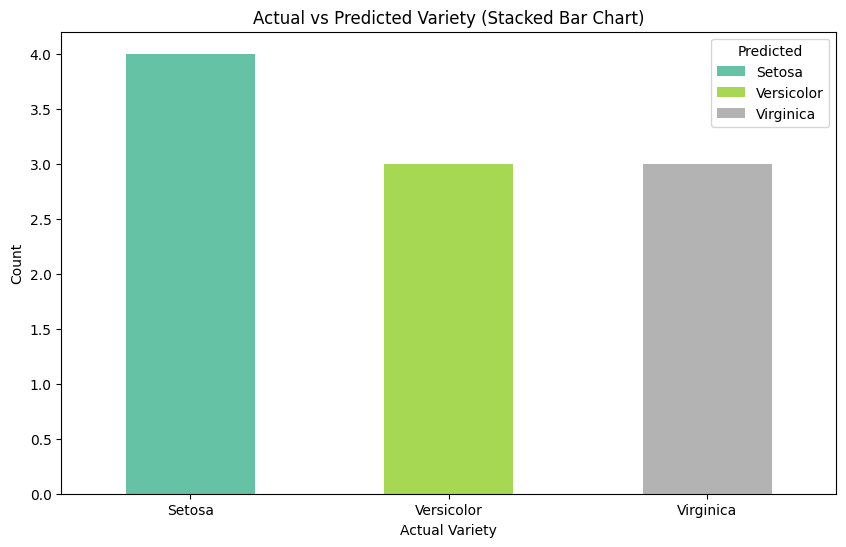

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


ct = pd.crosstab(df_new['variety'], df_new['predicted_variety'])


ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

plt.title('Actual vs Predicted Variety (Stacked Bar Chart)')
plt.xlabel('Actual Variety')
plt.ylabel('Count')
plt.legend(title='Predicted')
plt.xticks(rotation=0)
plt.show()